<a href="https://colab.research.google.com/github/Lewys-Tech/Artificial_Neural_Network/blob/main/Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Imports
import numpy as np
import sklearn
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
import pandas as pd
import plotly.express as px
import time
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

The function has the following parameters:

n_samples: Total number of generated points
noise: Standard deviation of Gaussian noise added to the data
random_state: Seed for reproducible output

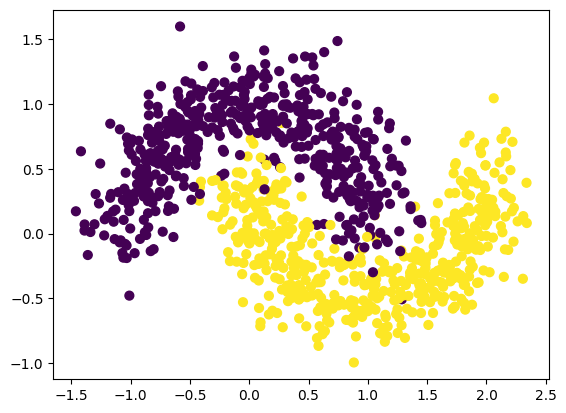

In [3]:
#Generating the dataset

n=1000
data_seed=4242  #Choose the seed value

X,y= sklearn.datasets.make_moons(
    n_samples=n,
    noise=0.2,
    random_state=data_seed
)

plt.scatter(
    X[:,0],
    X[:,1],
    s=40, #marker size
    c=y
)

The function has the following parameters:

X: The moons dataset
y: The labels
test_size: Size of the test dataset in percent
random_size: Seed for reproducible output
test_size = 0.25

In [4]:
#Split the dataset
test_size=0.25
split_seed=42   #Choose split seed value

X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    test_size=test_size,
    random_state=split_seed
)

In [5]:
#Define helper functions
#activation function

def sigmoid(z, derivation= False):
  if derivation:
    return sigmoid(z)*(1-sigmoid(z))
  else:
   return 1/(1+np.exp(-z))



In [6]:
# activation function (sigmod)
def sigmoid(z, derivation = False):
    if derivation:
        return sigmoid(z)*(1-sigmoid(z))
    else:
        return 1/(1+np.exp(-z))

# cost function (Mean squared error function)
def calculate_loss(model, X, y):
    # extract model parameters
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']

    # calculation of the estimated class probabilities
    ## calc hidden layer
    a1 = X.dot(W1) + b1
    h1 = sigmoid(a1)

    ## calc output layer
    a2 = h1.dot(W2) + b2
    probs = sigmoid(a2)[:,0]

    # calculation of the cost function value
    cost = np.power(y-probs,2)
    cost = np.sum(cost)/2

    return cost

# predict function
def predict(
        model,
        x,
        proba = False,
        decision_point = 0.5):

    # extract model parameters
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']

    # calculation of the estimated class probabilities (Forward Propagation)
    ## calc hidden layer
    a1 = x.dot(W1) + b1
    h1 = sigmoid(a1)

    ## calc output layer
    a2 = h1.dot(W2) + b2
    probs = sigmoid(a2)

    if(proba):
        return probs

    return (probs>decision_point)*1

In [14]:
def build_neural_network(
        X,                              # features
        y,                              # target
        iterations = 20000,            # number of gradient descent iterations
        learning_rate = 0.1,          # learning rate of Gradient descent
        random_state = None,          # random seed of weights
        hidden_nodes = 5,             # number of hidden nodes
        rand_range = 0.05):           # initialise the weights

    observations = X.shape[0]    # number of observations
    features = X.shape[1]        # number of features

    # initialise the parameters to random values:
    np.random.seed(random_state)
    W1 = np.random.uniform(low = -rand_range,
                           high = rand_range,
                           size= (features,hidden_nodes))    # (2,10)
    b1 = np.zeros((1,hidden_nodes))                          # (1,10)

    W2 = np.random.uniform(low = -rand_range,
                           high = rand_range,
                           size= (hidden_nodes,1))           # (10, 1)
    b2 = np.zeros((1,1))                                     # (1,1)

    # this is what we return at the end
    model = {}

    # Gradient descent:
    for i in range(0, iterations):
        # Forward propagation
        ## calc hidden layer
        a1 = X.dot(W1) + b1       # X: (750, 2), W1: (2,10), a1: (750, 10)
        h1 = sigmoid(a1)          # z1: (750, 10)

        ## calc output layer
        a2 = h1.dot(W2) + b2      # z1: (750, 10), W2: (10, 1), a2: (750, 1)
        probs = sigmoid(a2)       # probs: (750, 1)

        # Backpropagation
        # y.reshape: (750,1), probs: (750, 1), delta1: (750, 1)
        delta1 = (probs-y.reshape((observations,1))) * probs * (1 - probs)   # g(a_k)*(1-g(a_k))*(g(a_k)-t_k^n)

        dW2 = np.dot(h1.T, delta1)    # z1.T: (10, 750), delta1: (750,1), dW2: (10,1)
        db2 = np.sum(delta1, axis=0, keepdims=True)   # delta1: (750,1), db2: (1, 1)

        delta_j = delta1 * W2.T * h1 * (1 - h1)    # delta1: (750,1), W2.T: (1,10), z1: (750,10), delta_j: (750,10)

        dW1 = np.dot(X.T, delta_j)    # X.T: (2, 750), delta_j: (750,10), dW1: (750,1)
        db1 = np.sum(delta_j, axis=0) # delta_j: (750,10), db1: (10,1)

        # Gradient descent parameter update
        W1 += -learning_rate * dW1    # dW1: (750,1)
        b1 += -learning_rate * db1    # db1: (10,1)
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2

        # assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

        if i % 100 == 0:
            print("Loss after iteration %7d:\t%f" %(i, calculate_loss(model,X,y)))

    return model

# Train the neural network
model = build_neural_network(X = X_train,
                             y = y_train,
                             iterations = 20000,
                             random_state = 4242,
                             hidden_nodes = 5,
                             learning_rate = 0.1,
                             rand_range = 0.1)

Loss after iteration       0:	106.041985
Loss after iteration     100:	28.350135
Loss after iteration     200:	6.574476
Loss after iteration     300:	5.830356
Loss after iteration     400:	5.632859
Loss after iteration     500:	5.542499
Loss after iteration     600:	5.488368
Loss after iteration     700:	5.450384
Loss after iteration     800:	5.421188
Loss after iteration     900:	5.397531
Loss after iteration    1000:	5.377737
Loss after iteration    1100:	5.360816
Loss after iteration    1200:	5.346126
Loss after iteration    1300:	5.333215
Loss after iteration    1400:	5.321752
Loss after iteration    1500:	5.311484
Loss after iteration    1600:	5.302212
Loss after iteration    1700:	5.293780
Loss after iteration    1800:	5.286062
Loss after iteration    1900:	5.278955
Loss after iteration    2000:	5.272375
Loss after iteration    2100:	5.266253
Loss after iteration    2200:	5.260532
Loss after iteration    2300:	5.255162
Loss after iteration    2400:	5.250105
Loss after iteration  

In [15]:
from sklearn.metrics import classification_report
predictions = predict(model, X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       118
           1       0.95      0.95      0.95       132

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

